# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from pprint import pprint

url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

call_url = f"{url}appid={weather_api_key}&units={unit}&q="

temp = []
hum = []
cloud = []
wind = []
country = []
lat = []
lon = []

for city in cities:
    try:
        response = requests.get(call_url + city)
        data = response.json()
        country.append(data['sys']['country'])
        lat.append(data['coord']['lat'])
        lon.append(data['coord']['lon'])
        temp.append(data['main']['temp_max'])
        hum.append(data['main']['humidity'])
        cloud.append(data['clouds']['all'])
        wind.append(data['wind']['speed'])
        print(f"{city} found and stored!")
    except:
        print(f"{city} not found...skipping")
        country.append("NA")
        lat.append("NA")
        lon.append("NA")
        temp.append("NA")
        hum.append("NA")
        cloud.append("NA")
        wind.append("NA")
        continue



namatanai found and stored!
pevek found and stored!
comodoro rivadavia found and stored!
buala found and stored!
ushuaia found and stored!
yeniseysk found and stored!
te anau found and stored!
punta arenas found and stored!
sentyabrskiy not found...skipping
ribeira grande found and stored!
fare found and stored!
calbuco found and stored!
port alfred found and stored!
turangi found and stored!
jamestown found and stored!
kapaa found and stored!
rolla found and stored!
butaritari found and stored!
mataura found and stored!
hermanus found and stored!
ilulissat found and stored!
nikolskoye found and stored!
qaanaaq found and stored!
bambous virieux found and stored!
bluff found and stored!
kirakira found and stored!
tawkar not found...skipping
koltsovo found and stored!
hailar found and stored!
mar del plata found and stored!
kalmunai found and stored!
manokwari found and stored!
trelaze found and stored!
esperance found and stored!
kodiak found and stored!
ixtapa found and stored!
mareeba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_dict = {
    "City": cities,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind
}

cities_df = pd.DataFrame(cities_dict)

cities_df.to_csv("Output File/output.csv", index=False)

cities_df


,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,namatanai,PG,-3.67,152.43,78.44,80,10,5.39
1,pevek,RU,69.7,170.31,44.51,62,0,2.37
2,comodoro rivadavia,AR,-45.87,-67.5,44.6,87,75,3.36
3,buala,SB,-8.14,159.59,78.46,78,39,4.18
4,ushuaia,AR,-54.8,-68.3,30.2,92,75,6.93
...,...,...,...,...,...,...,...,...
601,necochea,AR,-38.55,-58.74,57.99,83,11,4
602,cacu,BR,-18.56,-51.13,82.9,27,0,9.35
603,auburn,US,47.31,-122.23,75,56,40,5.82
604,nabire,ID,-3.37,135.48,75.11,85,36,3.33


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Extract relevant fields from the data frame

clean_df = cities_df[~cities_df['Latitude'].isin(['NA'])]
clean_df['Humidity'].astype(float)

final_df = clean_df[~(clean_df['Humidity'] > 100)]
final_df

# Export the City_Data into a csv
final_df.to_csv("Output file/cleanoutput.csv", index=False)
#clean_df
final_df

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,namatanai,PG,-3.67,152.43,78.44,80,10,5.39
1,pevek,RU,69.7,170.31,44.51,62,0,2.37
2,comodoro rivadavia,AR,-45.87,-67.5,44.6,87,75,3.36
3,buala,SB,-8.14,159.59,78.46,78,39,4.18
4,ushuaia,AR,-54.8,-68.3,30.2,92,75,6.93
...,...,...,...,...,...,...,...,...
601,necochea,AR,-38.55,-58.74,57.99,83,11,4
602,cacu,BR,-18.56,-51.13,82.9,27,0,9.35
603,auburn,US,47.31,-122.23,75,56,40,5.82
604,nabire,ID,-3.37,135.48,75.11,85,36,3.33


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

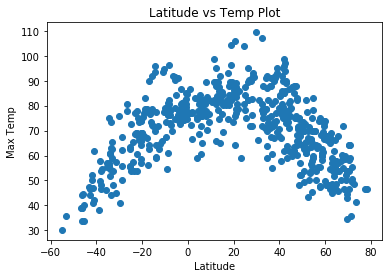

In [6]:
plt.scatter(final_df['Latitude'], final_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Temp Plot')
plt.savefig('Output File/Latitude vs Temp.png')
plt.show()

## Latitude vs. Humidity Plot

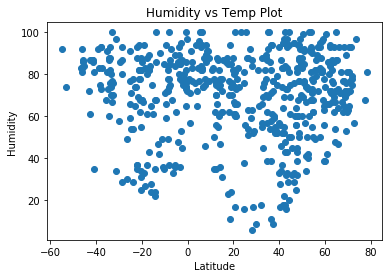

In [7]:
plt.scatter(final_df['Latitude'], final_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs Temp Plot')
plt.savefig('Output File/Latitude vs Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

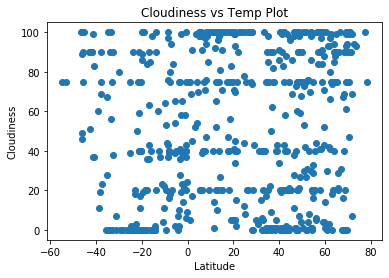

In [8]:
plt.scatter(final_df['Latitude'], final_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Temp Plot')
plt.savefig('Output File/Latitude vs Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

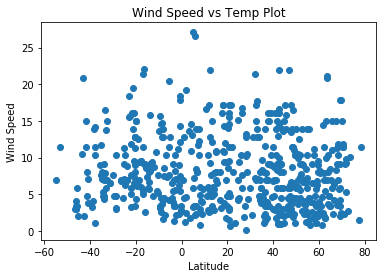

In [9]:
plt.scatter(final_df['Latitude'], final_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Temp Plot')
plt.savefig('Output File/Latitude vs Wind Speed.png')
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots

In [10]:
import scipy.stats as st
# Create Northern and Southern Hemisphere DataFrames
north_df = final_df[~(clean_df['Latitude'] <= 0)]
south_df = final_df[~(clean_df['Latitude'] >= 0)]

north_df

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
1,pevek,RU,69.7,170.31,44.51,62,0,2.37
5,yeniseysk,RU,58.45,92.17,58.1,81,97,2.33
9,ribeira grande,PT,38.52,-28.7,77,53,40,9.17
14,jamestown,US,42.1,-79.24,84.99,69,75,16.11
15,kapaa,US,22.08,-159.32,78.8,83,90,11.41
...,...,...,...,...,...,...,...,...
595,prince rupert,CA,54.32,-130.32,57.7,90,99,2.75
596,palmer,US,42.16,-72.33,96.01,52,20,3.36
599,guerrero negro,MX,27.98,-114.06,76.05,63,0,12.86
603,auburn,US,47.31,-122.23,75,56,40,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 Max Temp and Latitude correlation is -0.65


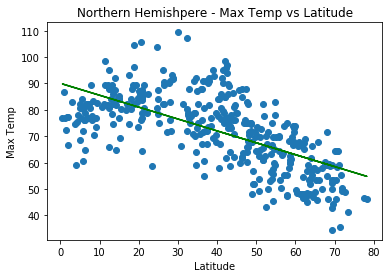

In [11]:

cor1 = round(st.pearsonr(north_df['Latitude'], north_df['Max Temp'])[0],2)
lin_reg = st.linregress(north_df['Latitude'].astype(float), north_df['Max Temp'].astype(float))

y_val =north_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Max Temp and Latitude correlation is {cor1}")
plt.scatter(north_df['Latitude'], north_df['Max Temp'])
plt.plot(north_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemishpere - Max Temp vs Latitude')
plt.savefig('Output File/NH-Latitude vs Temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 Max Temp and Latitude correlation is 0.81


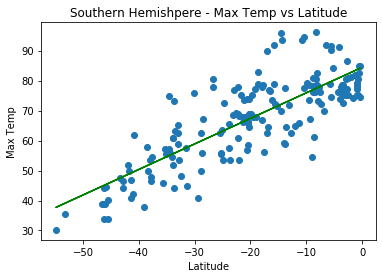

In [12]:
cor1 = round(st.pearsonr(south_df['Latitude'], south_df['Max Temp'])[0],2)
lin_reg = st.linregress(south_df['Latitude'].astype(float), south_df['Max Temp'].astype(float))

y_val =south_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Max Temp and Latitude correlation is {cor1}")
plt.scatter(south_df['Latitude'], south_df['Max Temp'])
plt.plot(south_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemishpere - Max Temp vs Latitude')
plt.savefig('Output File/SH-Latitude vs Max Temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Humidity and Latitude correlation is 0.01


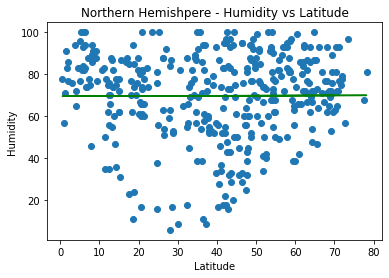

In [13]:
cor1 = round(st.pearsonr(north_df['Latitude'], north_df['Humidity'])[0],2)
lin_reg = st.linregress(north_df['Latitude'].astype(float), north_df['Humidity'].astype(float))

y_val =north_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Humidity and Latitude correlation is {cor1}")
plt.scatter(north_df['Latitude'], north_df['Humidity'])
plt.plot(north_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemishpere - Humidity vs Latitude')
plt.savefig('Output File/NH-Latitude vs Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Humidity and Latitude correlation is -0.14


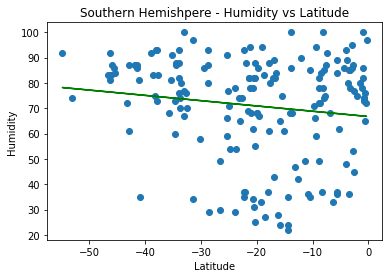

In [14]:
cor1 = round(st.pearsonr(south_df['Latitude'], south_df['Humidity'])[0],2)
lin_reg = st.linregress(south_df['Latitude'].astype(float), south_df['Humidity'].astype(float))

y_val =south_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Humidity and Latitude correlation is {cor1}")
plt.scatter(south_df['Latitude'], south_df['Humidity'])
plt.plot(south_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemishpere - Humidity vs Latitude')
plt.savefig('Output File/SH-Latitude vs Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Cloudiness and Latitude correlation is -0.02


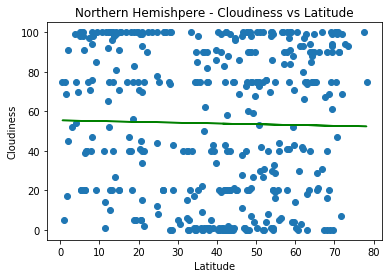

In [15]:
cor1 = round(st.pearsonr(north_df['Latitude'], north_df['Cloudiness'])[0],2)
lin_reg = st.linregress(north_df['Latitude'].astype(float), north_df['Cloudiness'].astype(float))

y_val =north_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Cloudiness and Latitude correlation is {cor1}")
plt.scatter(north_df['Latitude'], north_df['Cloudiness'])
plt.plot(north_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemishpere - Cloudiness vs Latitude')
plt.savefig('Output File/NH-Latitude vs Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Cloudiness and Latitude correlation is -0.15


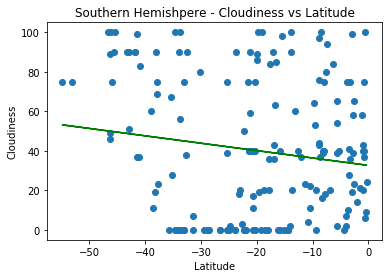

In [16]:
cor1 = round(st.pearsonr(south_df['Latitude'], south_df['Cloudiness'])[0],2)
lin_reg = st.linregress(south_df['Latitude'].astype(float), south_df['Cloudiness'].astype(float))

y_val =south_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Cloudiness and Latitude correlation is {cor1}")
plt.scatter(south_df['Latitude'], south_df['Cloudiness'])
plt.plot(south_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemishpere - Cloudiness vs Latitude')
plt.savefig('Output File/SH-Latitude vs Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Wind Speed and Latitude correlation is -0.1


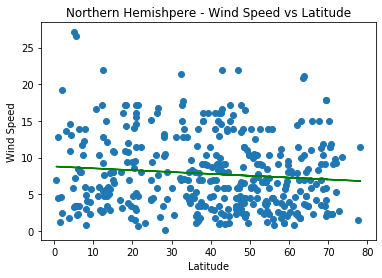

In [17]:
cor1 = round(st.pearsonr(north_df['Latitude'], north_df['Wind Speed'])[0],2)
lin_reg = st.linregress(north_df['Latitude'].astype(float), north_df['Wind Speed'].astype(float))

y_val =north_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Wind Speed and Latitude correlation is {cor1}")
plt.scatter(north_df['Latitude'], north_df['Wind Speed'])
plt.plot(north_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemishpere - Wind Speed vs Latitude')
plt.savefig('Output File/NH-Latitude vs Wind Speed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Wind Speed and Latitude correlation is 0.04


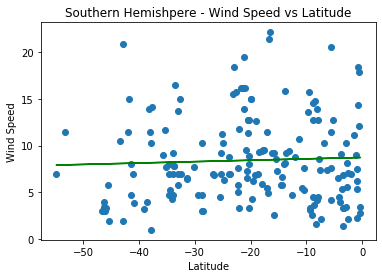

In [18]:
cor1 = round(st.pearsonr(south_df['Latitude'], south_df['Wind Speed'])[0],2)
lin_reg = st.linregress(south_df['Latitude'].astype(float), south_df['Wind Speed'].astype(float))

y_val =south_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Wind Speed and Latitude correlation is {cor1}")
plt.scatter(south_df['Latitude'], south_df['Wind Speed'])
plt.plot(south_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemishpere - Wind Speed vs Latitude')
plt.savefig('Output File/SH-Latitude vs Wind Speed.png')
plt.show()